In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [158]:
class SingleLayerNN:
    def __init__(self, input_dim, seed=42):
        np.random.seed(seed)
        self.input_dim = input_dim
        self.weights = np.random.randn(input_dim)
        self.bias = np.random.randn(1)

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def sigmoid_der(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def f_propagation(self, inputs, validation=False):
        if validation == True:
            z = np.dot(inputs, self.weights) + self.bias
        else:
            z = np.dot(inputs, self.weights) + self.bias
        return self.sigmoid(z)
    
    def loss(self, predictions, targets):
        eps = 1e-15
        predictions = np.maximum(eps, np.minimum(1-eps, predictions))
        loss = np.linalg.norm(-(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions)))
        return loss
    
    def b_propagation(self, inputs, predictions, targets, learning_rate):
        delta_w = learning_rate * np.dot(inputs.T, (targets - predictions))
        delta_b = np.mean(learning_rate * (targets - predictions))
        return delta_w, delta_b

    def update_weights_and_biases(self, delta_w, delta_b):
        self.weights = self.weights + delta_w
        self.bias = self.bias + delta_b

    def train(self, inputs, targets, validation_data_inputs, validation_data_targets, epochs=1000, learning_rate=0.01, showIterations = True):
        for i in range(epochs):
            #training
            predictions = self.f_propagation(inputs)
            
            loss = self.loss(predictions, targets)
            delta_w, delta_b = self.b_propagation(inputs, predictions, targets, learning_rate)
            self.update_weights_and_biases(delta_w, delta_b)

            #validation
            val_predictions = self.f_propagation(validation_data_inputs, validation=True)
            val_loss = self.loss(val_predictions, validation_data_targets)
            
            if showIterations == True:
                print('Iteration: '+str(i)+', Loss:'+str(loss)+', Validation Loss:'+str(val_loss))
            
    def predict(self, x):
        predictions = self.f_propagation(x)
        return predictions
    
    def plot_decision_boundary(self, inputs, targets, title):
        x_min , x_max = inputs[:, 0]. min() - 1, inputs[:, 0]. max() + 1
        x_values = np.linspace(x_min , x_max , 200)
        
        y_values = ((-self.weights[0] / self.weights[1]) * x_values) - (self.bias / self.weights[1])

        plt.figure(figsize=(8, 6))
        plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, s=20)
        
        plt.plot(x_values, y_values, label='Decision Boundary')
        plt.xlim(x_min, x_max)
        plt.ylim(inputs[:, 1]. min() - 1, inputs[:, 1]. max() + 1)
        plt.title(title)
        plt.grid(True)
        plt.show()  

In [3]:
#create synthetic dataset
n_samples = 100
features_class_0 = np.random.randn(n_samples, 2) + [2, -2] # Class 0
features_class_1 = np.random.randn(n_samples, 2) + [-2, 2] # Class 1
inputs = np.vstack((features_class_0, features_class_1))
targets = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

#standardize the features
inputs = (inputs - np.mean(inputs, axis=0)) / np.std(inputs, axis=0)

#create validation data
n_samples_val = 100
features_class_0_val = np.random.randn(n_samples_val, 2) + [2, -2]  # Class 0
features_class_1_val = np.random.randn(n_samples_val, 2) + [-2, 2]  # Class 1
inputs_val = np.vstack((features_class_0_val, features_class_1_val))
targets_val = np.hstack((np.zeros(n_samples_val), np.ones(n_samples_val)))

# Standardize the validation features
inputs_val = (inputs_val - np.mean(inputs_val, axis=0)) / np.std(inputs_val, axis=0)


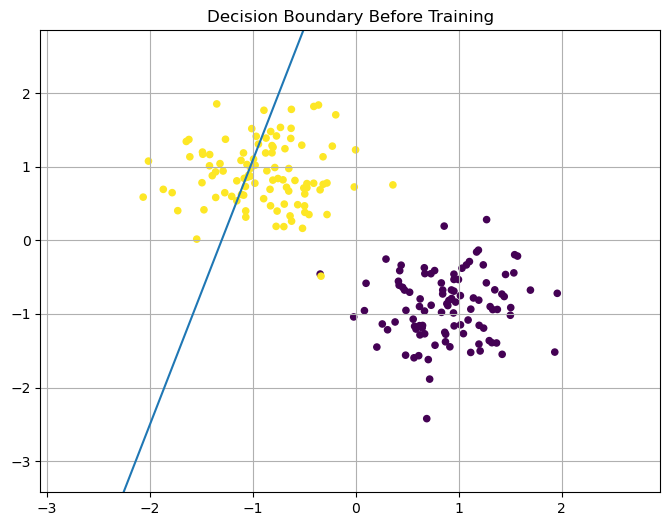

In [4]:
model = SingleLayerNN(input_dim=2)
model.plot_decision_boundary(inputs, targets, title='Decision Boundary Before Training')

Iteration: 0, Loss:16.34905481451177, Validation Loss:0.5002425603869384
Iteration: 1, Loss:15.24251186606376, Validation Loss:0.36419079681412864
Iteration: 2, Loss:14.885197183865847, Validation Loss:0.2606481685887522
Iteration: 3, Loss:14.527884862417453, Validation Loss:0.18465834976352424
Iteration: 4, Loss:14.170575879758292, Validation Loss:0.13154209503606992
Iteration: 5, Loss:13.813271619088924, Validation Loss:0.09833485220691845
Iteration: 6, Loss:13.455974036567845, Validation Loss:0.084474742405654
Iteration: 7, Loss:13.098685898553224, Validation Loss:0.08934399692132888
Iteration: 8, Loss:12.741411116979426, Validation Loss:0.10958026443110455
Iteration: 9, Loss:12.384155223361057, Validation Loss:0.1422113062446616


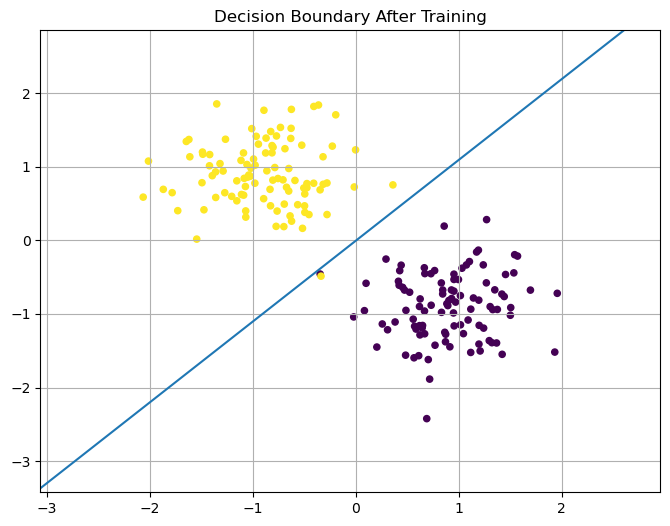

In [165]:
model_trained = SingleLayerNN(input_dim=2)
model_trained.train(inputs, targets, inputs_val, targets_val, epochs=10, learning_rate=1)
model_trained.plot_decision_boundary(inputs, targets, title='Decision Boundary After Training')

***DISCUSSION IMPLEMENTATION AND RESULTS***  
- Before training and after training:  
    - In the plot 'Decision Boundary Before Training' we can clearly see how the non updated weights and bias fail to plot a proper decision boundary while in the plot 'Decision Boundary After Training' we can see how the model achieves a proper decision boundary with the updated weights and bias.
- The learning rate problem, in this case scenario having 10 epochs has to be increased so the steps are bigger to better approximate the function. Although we have a problem with the dataset as it is synthetic if we train with over 10 iterations the weights and bias start to represent the whole dataset instead of generalising data due to overfitting.